File: forecasting_data/synthetic_train_dataset.csv
Shape: (6000, 7)

Columns:
['Harvest_Date', 'Location', 'Soil_Type', 'Avg_Temp_C', 'Avg_Rain_mm', 'Avg_Humidity', 'Yield_kg']

Data types:
Harvest_Date     object
Location         object
Soil_Type        object
Avg_Temp_C      float64
Avg_Rain_mm     float64
Avg_Humidity    float64
Yield_kg          int64
dtype: object

First 10 rows:


,Harvest_Date,Location,Soil_Type,Avg_Temp_C,Avg_Rain_mm,Avg_Humidity,Yield_kg
0,2000-01-02,Block_C_Hill,Laterite,27.2,154.8,71.6,14028
1,2000-01-04,Block_B_Valley,Clay Loam,27.2,167.4,73.2,12989
2,2000-01-06,Block_A_North,Sandy Loam,27.5,162.0,79.8,14419
3,2000-01-08,Block_B_Valley,Clay Loam,26.8,155.3,84.3,13691
4,2000-01-09,Block_C_Hill,Laterite,26.6,152.9,78.2,14242
5,2000-01-10,Block_C_Hill,Laterite,28.9,162.2,70.1,12106
6,2000-01-12,Block_D_River,Alluvial,27.2,172.2,76.4,12605
7,2000-01-13,Block_A_North,Sandy Loam,26.9,176.4,77.7,14604
8,2000-01-15,Block_C_Hill,Laterite,28.3,159.4,76.1,13200
9,2000-01-17,Block_C_Hill,Laterite,26.9,184.0,68.2,14021



Missing values (count, pct):
Empty DataFrame
Columns: [missing_count, missing_pct]
Index: []

Numeric columns: ['Avg_Temp_C', 'Avg_Rain_mm', 'Avg_Humidity', 'Yield_kg']
               count          mean          std     min      25%       50%  \
Avg_Temp_C    6000.0     25.053467     3.856014    15.0     21.7     25.10   
Avg_Rain_mm   6000.0    120.925967    59.878335     0.0     67.3    122.05   
Avg_Humidity  6000.0     70.142050     8.693841    41.5     63.6     70.05   
Yield_kg      6000.0  13149.745333  1303.238572  8132.0  12193.5  13170.50   

                    75%      max  
Avg_Temp_C       28.300     34.7  
Avg_Rain_mm     173.825    269.0  
Avg_Humidity     76.800     95.9  
Yield_kg      14111.000  17097.0  

Skewness and Kurtosis:
               skew  kurtosis
Avg_Temp_C   -0.031    -1.071
Avg_Rain_mm  -0.007    -1.188
Avg_Humidity  0.007    -0.639
Yield_kg     -0.077    -0.467


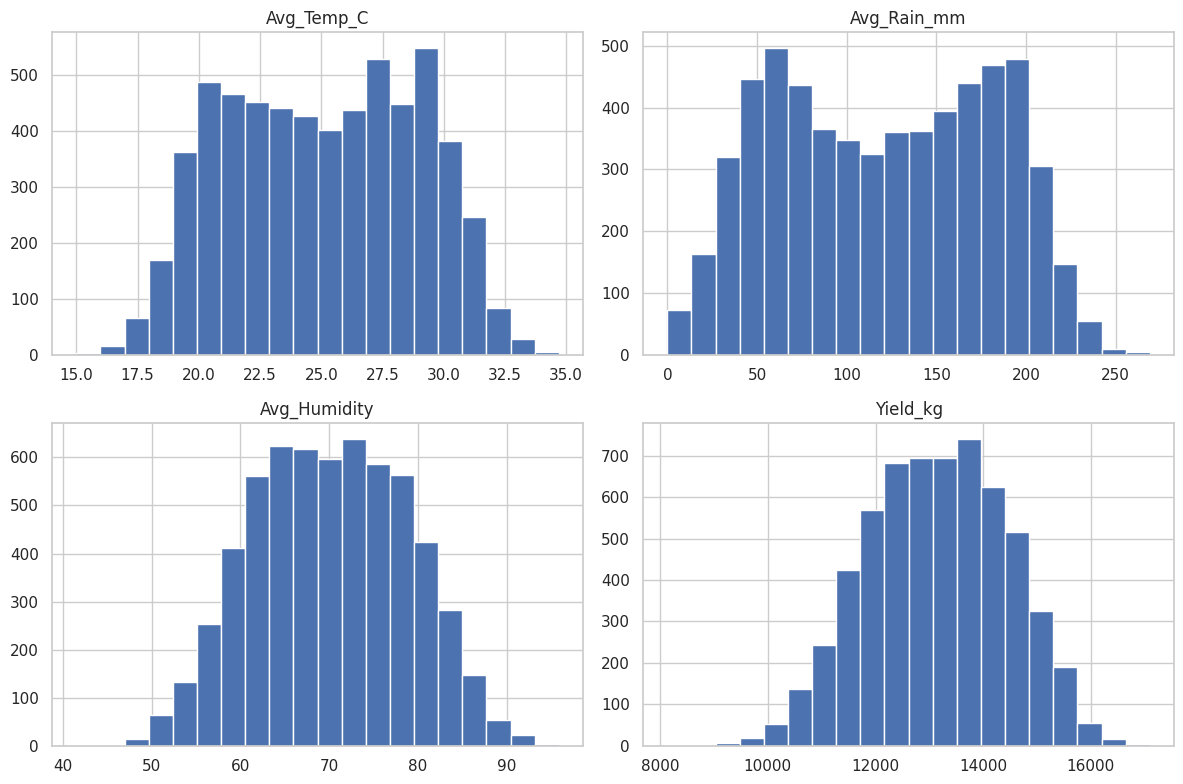

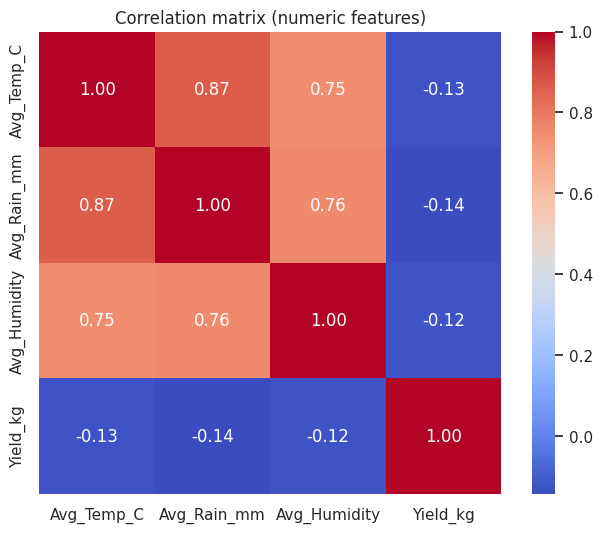


Categorical columns detected: ['Harvest_Date', 'Location', 'Soil_Type']


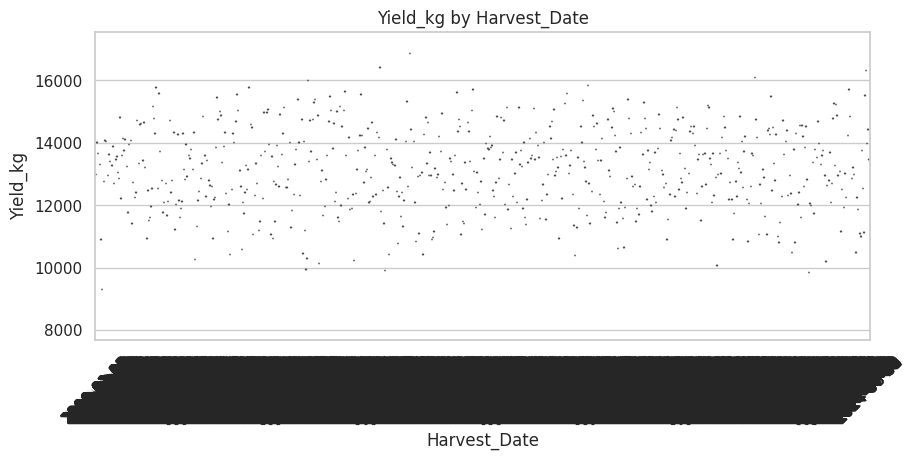

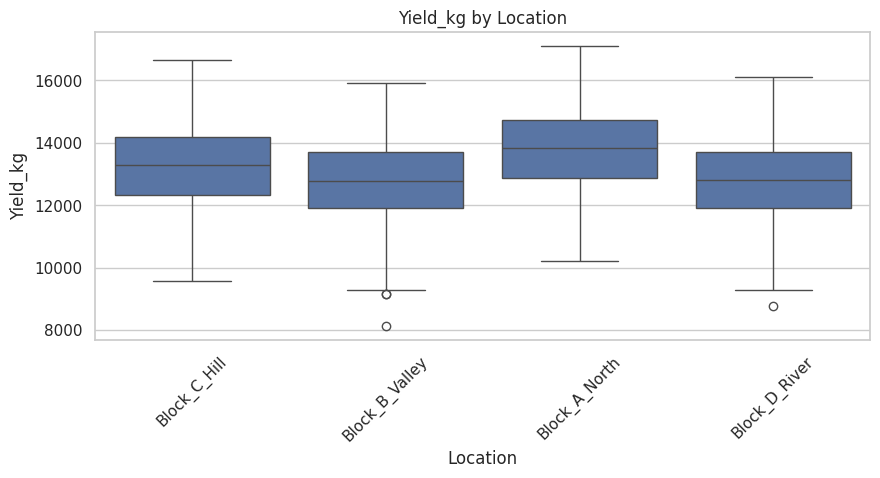

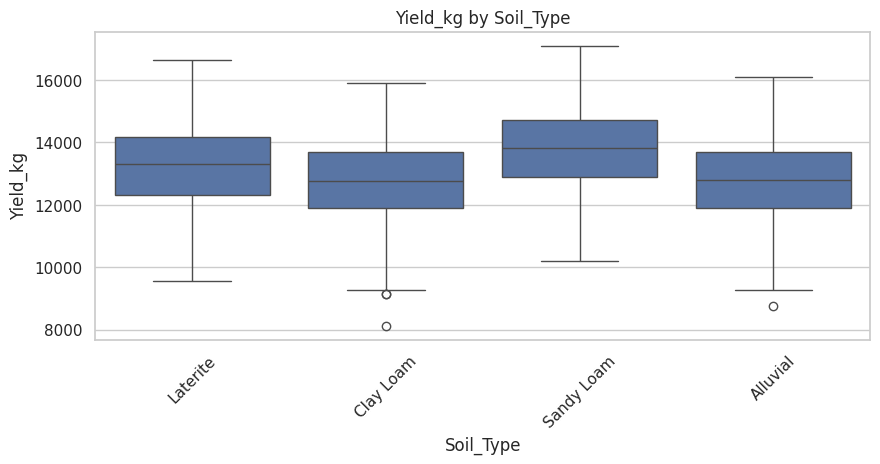


Using Harvest_Date as datetime index for time-series plots


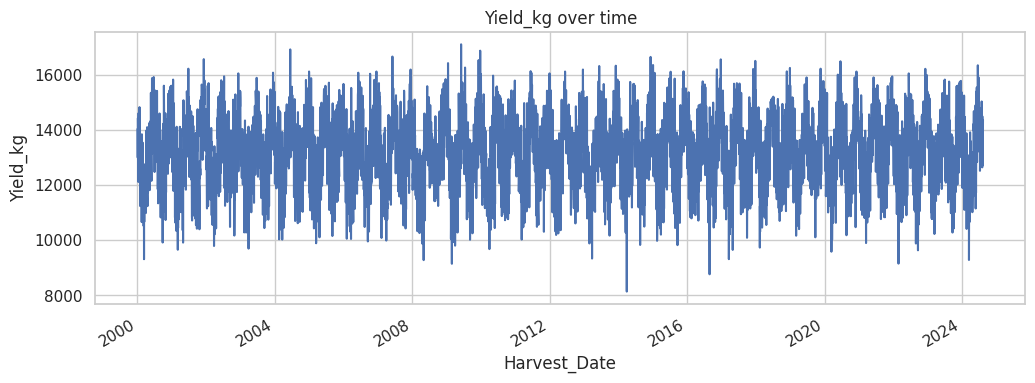


Counts per categorical column:

Harvest_Date value counts:
Harvest_Date
2024-07-14    1
2024-07-12    1
2024-07-10    1
2024-07-08    1
2024-07-06    1
2024-07-05    1
2024-07-04    1
2024-07-03    1
2024-07-02    1
2024-07-01    1
2024-06-30    1
2024-06-29    1
2024-06-27    1
2024-06-25    1
2024-06-23    1
2024-06-22    1
2000-02-18    1
2000-02-17    1
2000-02-16    1
2000-02-15    1
Name: count, dtype: int64

Location value counts:
Location
Block_C_Hill      1544
Block_B_Valley    1530
Block_A_North     1467
Block_D_River     1459
Name: count, dtype: int64

Soil_Type value counts:
Soil_Type
Laterite      1544
Clay Loam     1530
Sandy Loam    1467
Alluvial      1459
Name: count, dtype: int64

EDA for synthetic training dataset complete.


In [23]:
# EDA: Summary and plots for synthetic training dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')
%matplotlib inline

csv_path = 'forecasting_data/synthetic_train_dataset.csv'
try:
    df = pd.read_csv(csv_path)
except Exception as e:
    raise RuntimeError(f'Failed to read {csv_path}: {e}')

print('File:', csv_path)
print('Shape:', df.shape)
print('\nColumns:')
print(list(df.columns))
print('\nData types:')
print(df.dtypes)

print('\nFirst 10 rows:')
display(df.head(10))

# Missing values
miss = df.isna().sum()
miss_pct = (miss / len(df) * 100).round(2)
miss_df = pd.concat([miss, miss_pct], axis=1)
miss_df.columns = ['missing_count','missing_pct']
print('\nMissing values (count, pct):')
print(miss_df[miss_df['missing_count']>0])

# Numeric summary
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print('\nNumeric columns:', num_cols)
if num_cols:
    print(df[num_cols].describe().T)
    skew_kurt = pd.DataFrame({'skew': df[num_cols].skew(), 'kurtosis': df[num_cols].kurtosis()}).round(3)
    print('\nSkewness and Kurtosis:')
    print(skew_kurt)

# Histograms for numeric cols
if num_cols:
    df[num_cols].hist(bins=20, figsize=(12, max(4, len(num_cols)*2)))
    plt.tight_layout()
    plt.show()

# Correlation heatmap
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation matrix (numeric features)')
    plt.show()

# Boxplot of target by categorical features (if present)
target = 'Yield_kg'
cat_candidates = [c for c in df.columns if df[c].dtype == 'object' or df[c].dtype.name == 'category']
print('\nCategorical columns detected:', cat_candidates)
if target in df.columns and len(cat_candidates) > 0:
    for c in cat_candidates:
        plt.figure(figsize=(10,4))
        sns.boxplot(x=c, y=target, data=df)
        plt.title(f'{target} by {c}')
        plt.xticks(rotation=45)
        plt.show()

# Timeseries check: if a Date column exists, plot target over time for first location (if multi-location)
date_cols = [c for c in df.columns if 'date' in c.lower()]
if date_cols:
    date_col = date_cols[0]
    try:
        df[date_col] = pd.to_datetime(df[date_col])
        print(f'\nUsing {date_col} as datetime index for time-series plots')
        ts_df = df.set_index(date_col).sort_index()
        if target in ts_df.columns:
            plt.figure(figsize=(12,4))
            ts_df[target].plot(title=f'{target} over time')
            plt.ylabel(target)
            plt.show()
    except Exception as e:
        print('Failed to parse date column:', e)

# Print simple aggregates per categorical column (counts)
if cat_candidates:
    print('\nCounts per categorical column:')
    for c in cat_candidates:
        print(f'\n{c} value counts:')
        print(df[c].value_counts().head(20))

print('\nEDA for synthetic training dataset complete.')